In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [82]:
#Script file should be csv and cast file should be txt file
def perform_analysis(script_file,cast_file):
    movie_name=cast_file.split(".")[0]
    print("Performing analysis on ",movie_name)
    with open(script_file) as f:
        dialogues=f.readlines()[1:]
    dialogue_list=[]
    #List for spoken by
    spoken_by_list=[]
    for dialogue in dialogues:
        dialogue_spoken_by=dialogue.split(",")[0]
        if(len(dialogue_spoken_by)>30):
            continue
        start=dialogue_spoken_by.find('(')
        end=dialogue_spoken_by.find(')')
        if start!=-1 and end!=-1:
            dialogue_spoken_by=dialogue_spoken_by[:start].strip()
        spoken_by_list.append(dialogue_spoken_by)    
    
    ####### Read Cast file #########
    cast=pd.read_csv(cast_file)
    char_gender=dict(zip(cast["Character"].str.lower(),cast["Gender"].str.strip()))
    gender_dialogue_dict={"Male":0,"Female":0}
    for character in spoken_by_list:
        if character.lower() in char_gender:
            gender_dialogue_dict[char_gender[character.lower()]]+=1
    print("Plotting gender diversity in",gender_dialogue_dict)
    plt.bar(gender_dialogue_dict.keys(),gender_dialogue_dict.values())
    plt.show()
    racial_dict={"White":0,"POC":0}
    for actor,ethincity in zip(cast["Name"],cast["Ethinicity"]):
        racial_dict[ethincity]+=1
    print("Plotting racial diversity in",movie_name)
    plt.bar(racial_dict.keys(),racial_dict.values())
    plt.show()
    return gender_dialogue_dict,racial_dict

Performing analysis on  Roma
Plotting gender diversity in {'Male': 234, 'Female': 483}


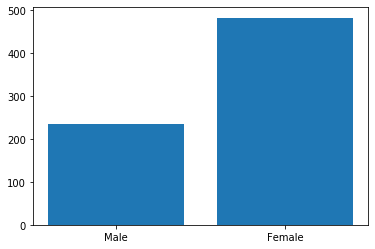

Plotting racial diversity in Roma


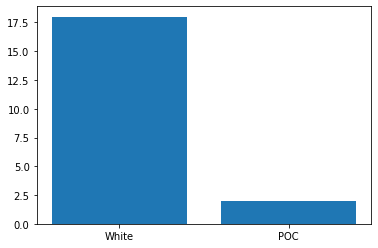

In [67]:
#For movie Roma
roma_gender,roma_racial=perform_analysis("roma-script","Roma.csv")

Performing analysis on  green-book
Plotting gender diversity in {'Male': 134, 'Female': 45}


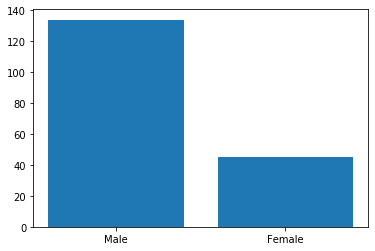

Plotting racial diversity in green-book


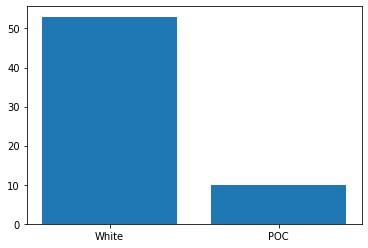

In [68]:
green_book_gender,green_book_racial=perform_analysis("green-book-script","green-book.csv")

Performing analysis on  the-favourite
Plotting gender diversity in {'Male': 210, 'Female': 719}


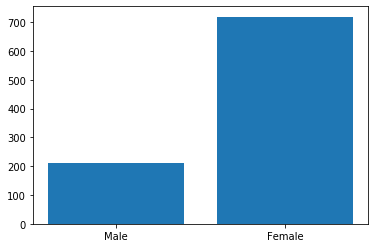

Plotting racial diversity in the-favourite


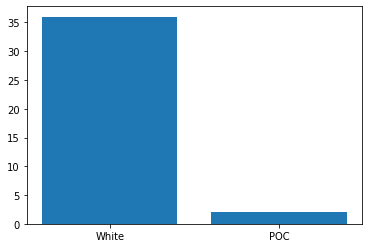

In [69]:
the_favourite_gender,the_favourite_racial=perform_analysis("the-favourite-script","the-favourite.csv")

Performing analysis on  vice
Plotting gender diversity in {'Male': 176, 'Female': 99}


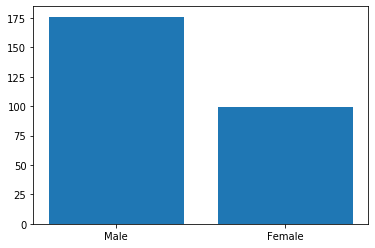

Plotting racial diversity in vice


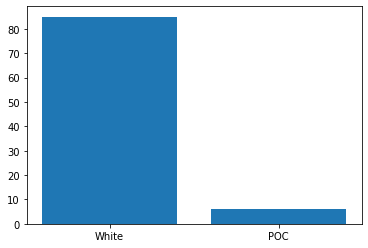

In [70]:
vice_gender,vice_racial=perform_analysis("vice-script","vice.csv")

Performing analysis on  first-reformed
Plotting gender diversity in {'Male': 346, 'Female': 123}


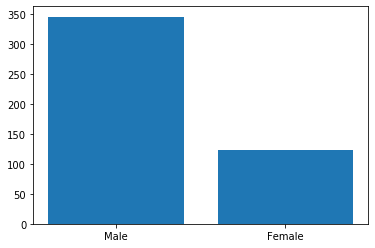

Plotting racial diversity in first-reformed


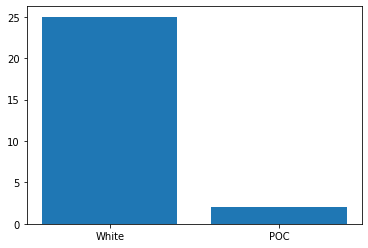

In [71]:
first_reformed_gender,first_reformed_racial=perform_analysis("first-reformed-script","first-reformed.csv")

In [65]:
## Box Office Records of Movies in million dollars
box_office_dict={"Roma":5.1,"the-favourite":95.9,"green-book":322.7,"vice":76,"first-reformed":3.5}

<BarContainer object of 5 artists>

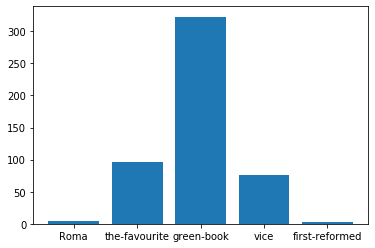

In [66]:
plt.bar(box_office_dict.keys(),box_office_dict.values())

## Plot comparing Box office of each films with gender variance of dialogues

In [73]:
female_dict={}
female_dict["Roma"]=roma_gender["Female"]
female_dict["the-favourite"]=the_favourite_gender["Female"]
female_dict["green-book"]=green_book_gender["Female"]
female_dict["vice"]=vice_gender["Female"]
female_dict["first_reformed"]=first_reformed_gender["Female"]

In [75]:
female_dict.keys()

dict_keys(['Roma', 'the-favourite', 'green-book', 'vice', 'first_reformed'])

In [76]:
def subcategorybar(X, vals, width=0.8):
    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
        plt.bar(_X - width/2. + i/float(n)*width, vals[i], 
                width=width/float(n), align="edge")   
    plt.xticks(_X, X)


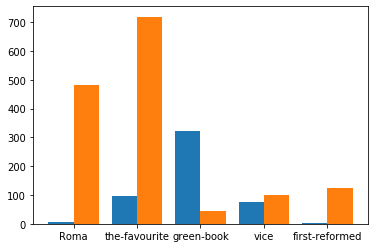

In [78]:
subcategorybar(box_office_dict.keys(), [box_office_dict.values(),female_dict.values()])
plt.show()
#Orange- female words, blue- box office

## Plot comparing Box office of each films with racial diversity of cast (Person of color)

In [79]:
racial_dict={}
racial_dict["Roma"]=roma_racial["POC"]
racial_dict["the-favourite"]=the_favourite_racial["POC"]
racial_dict["green-book"]=green_book_racial["POC"]
racial_dict["vice"]=vice_racial["POC"]
racial_dict["first_reformed"]=first_reformed_racial["POC"]

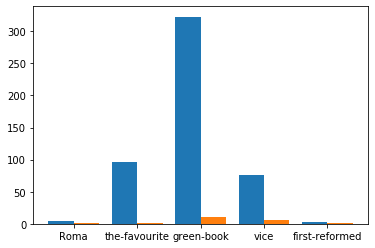

In [80]:
subcategorybar(box_office_dict.keys(), [box_office_dict.values(),racial_dict.values()])
plt.show()
#Orange- no of POC cast, blue- box office

There is an improvement in the box office with the increase in POC cast